In [1]:
from astropy.modeling.models import Gaussian2D
import numpy as np
from photutils.datasets import make_noise_image
from astropy.io import fits
import matplotlib.pyplot as plt
from photutils.aperture import EllipticalAperture
from photutils.isophote import EllipseGeometry
from photutils.isophote import Ellipse
from photutils.isophote import build_ellipse_model
import numpy.ma as ma
from astropy.convolution import convolve, Gaussian2DKernel, convolve_fft, Box2DKernel
from scipy.ndimage.filters import median_filter

In [2]:
hdu_i = fits.open('final_i.fits')
dati = hdu_i[1].data
sky_i = np.mean(dati[1000:1500,1000:1500])

In [4]:
dati[np.isnan(dati)] = 0

In [5]:
x = hdu_i[1].header['NAXIS1']
y = hdu_i[1].header['NAXIS2']
mask = np.full((y, x),False)

In [6]:
mask[dati<5000]=True

In [7]:
for x in range(1350,1550):
    for y in range(4220,4450):
        mask[y][x] = True

for x in range(2400,2500):
    for y in range(4320,4450):
        mask[y][x] = True


In [8]:
mdata = ma.masked_array(dati, mask)

In [9]:
filtered = median_filter(dati,size=(100))

In [15]:
resti = dati - filtered

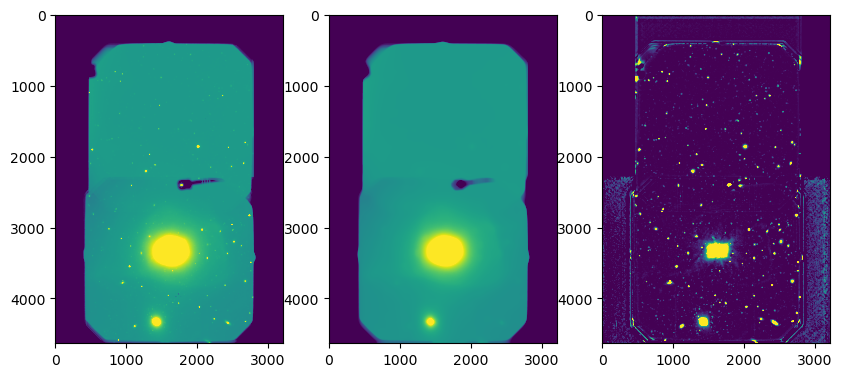

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(10, 8), nrows=1, ncols=3)

ax1.imshow(dati,vmin=4000,vmax=16000)
#ax1.colorbar()

ax2.imshow(filtered,vmax=16000,vmin=4000)
#ax2.colorbar()

ax3.imshow(resti.data,vmax=1000,vmin=0)

In [17]:
hdu_i[1].data = resti

In [13]:
hdu_i.writeto('rest_i.fits')

In [18]:
sky_i = np.mean(dati[1000:1500,1000:1500])

sk_i = resti + sky_i

hdu_i[1].data = sk_i
hdu_i.writeto('sky_i.fits')

In [19]:
hdu_g = fits.open('final_g.fits')

In [20]:
datg = hdu_g[1].data

In [21]:
filtered = median_filter(datg,size=(100))

In [22]:
restg = datg - filtered

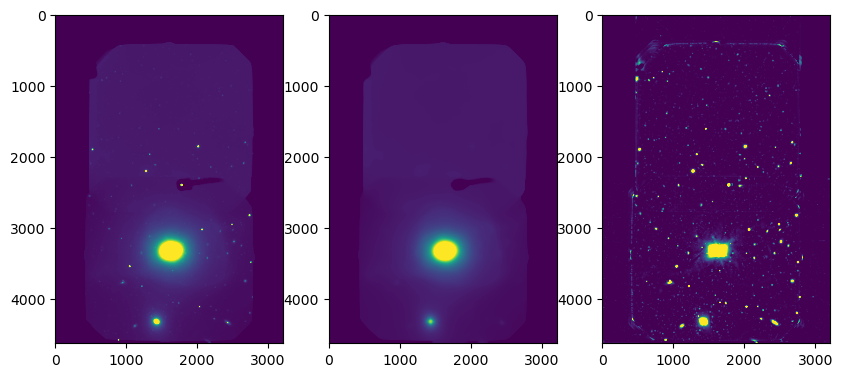

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(10, 8), nrows=1, ncols=3)

ax1.imshow(datg,vmin=4000,vmax=16000)
#ax1.colorbar()

ax2.imshow(filtered,vmax=16000,vmin=4000)
#ax2.colorbar()

ax3.imshow(restg.data,vmax=1000,vmin=0)

In [24]:
hdu_g[1].data = restg

In [25]:
sky_g = np.mean(datg[1000:1500,1000:1500])

sk_g = restg + sky_g

hdu_g[1].data = sk_g
hdu_g.writeto('sky_g.fits')

In [26]:
hdu_g.writeto('rest_g.fits')

In [27]:
hdu_r = fits.open('final_r.fits')
datr = hdu_r[1].data

In [28]:
filteredr = median_filter(datr,size=(100))

In [29]:
restr = datr - filteredr

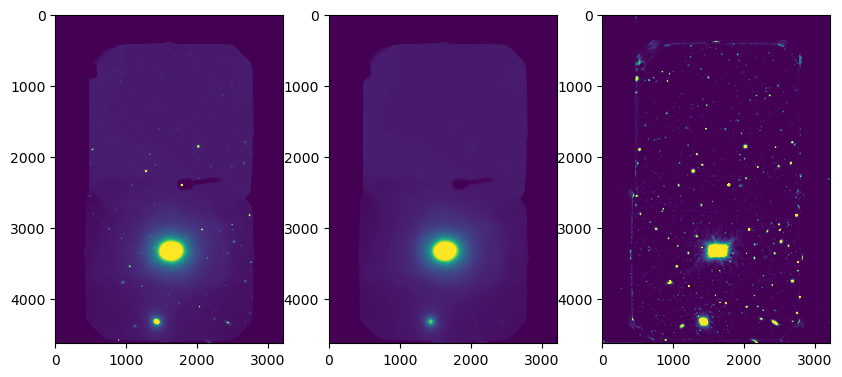

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(10, 8), nrows=1, ncols=3)

ax1.imshow(datr,vmin=4000,vmax=16000)
#ax1.colorbar()

ax2.imshow(filteredr,vmax=16000,vmin=4000)
#ax2.colorbar()

ax3.imshow(restr.data,vmax=1000,vmin=0)

In [31]:
hdu_r[1].data = restr

In [32]:
hdu_r.writeto('rest_r.fits')

In [33]:
sky_r = np.mean(datr[1000:1500,1000:1500])

sk = restr + sky_r

hdu_r[1].data = sk
hdu_r.writeto('sky_r.fits')

In [34]:
im_g = fits.open('sky_g.fits')
im_r = fits.open('sky_r.fits')
im_i = fits.open('sky_i.fits')

datg = im_g[1].data
datr = im_r[1].data
dati = im_i[1].data



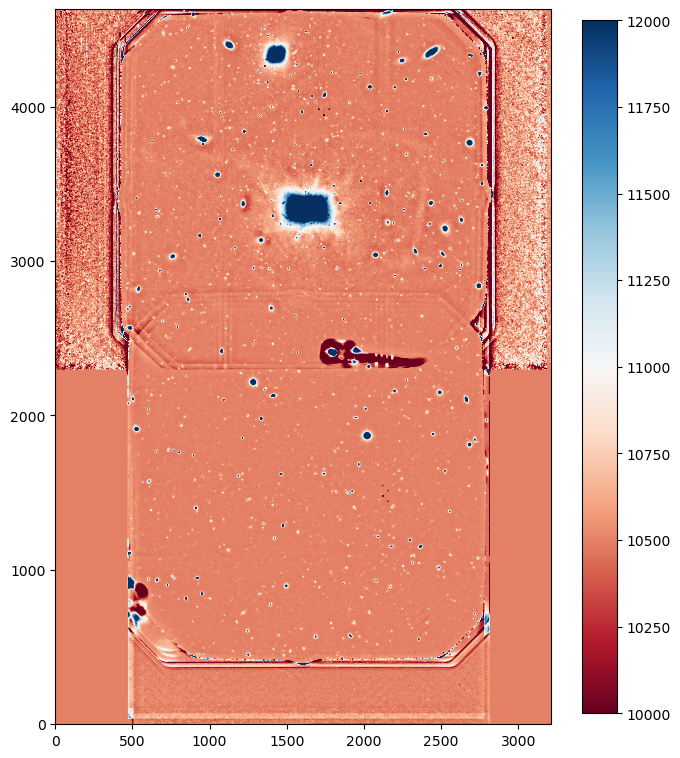

In [35]:
fig,ax = plt.subplots(figsize=(8,15))

plt.imshow(dati,origin='lower',cmap=plt.cm.RdBu,vmin=10000,vmax=12000)

plt.colorbar(shrink=0.6)

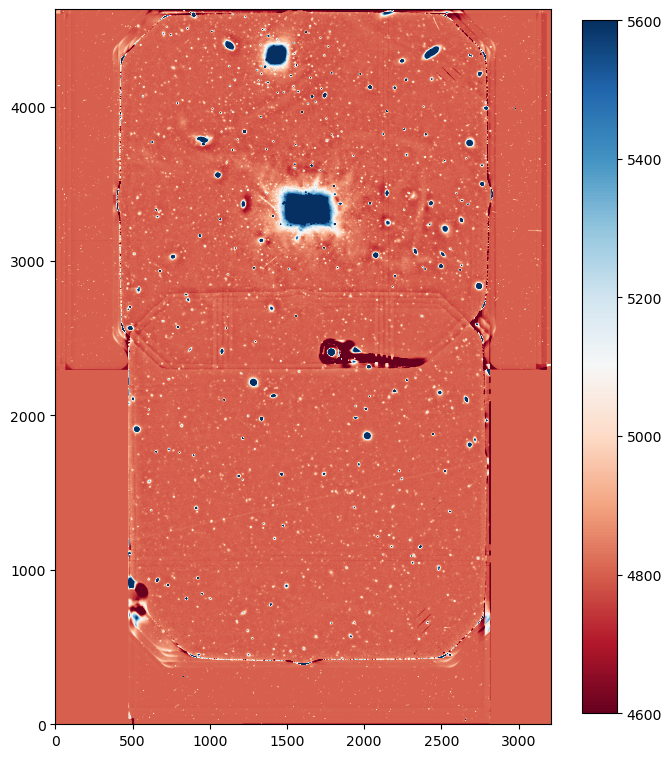

In [36]:
fig,ax = plt.subplots(figsize=(8,15))

plt.imshow(datg,origin='lower',cmap=plt.cm.RdBu,vmin=4600,vmax=5600)

plt.colorbar(shrink=0.6)

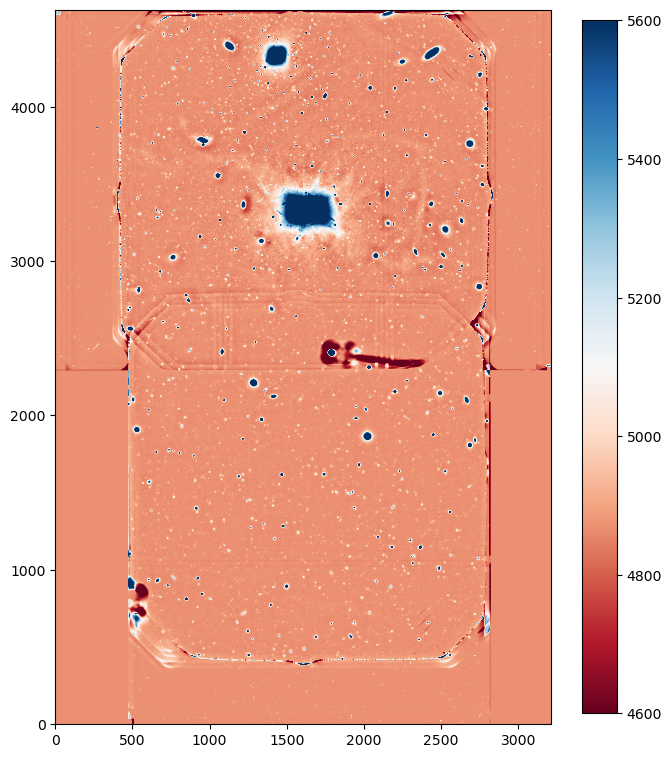

In [37]:
fig,ax = plt.subplots(figsize=(8,15))

plt.imshow(datr,origin='lower',cmap=plt.cm.RdBu,vmin=4600,vmax=5600)

plt.colorbar(shrink=0.6)